## Dimensionality Reduction: Wine Dataset
https://archive.ics.uci.edu/ml/datasets/wine

** Dataset Information: **

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines

** Attribute Information: **

Class: class 1 (59), class 2 (71), class 3 (48)

1. Alcohol (class)
2. Malic acid 
3. Ash 
4. Alcalinity of ash 
5. Magnesium 
6. Total phenols 
7. Flavanoids 
8. Nonflavanoid phenols 
9. Proanthocyanins 
10. Color intensity 
11. Hue 
12. OD280/OD315 of diluted wines 
13. Proline 

** Objective of this project **

Using chemical analysis (compressed features with PCA,LDA & Kernel PCA) determine the origin of wines (class, 1-3)

## Data

In [9]:
options(warn=-1)
# Load Data
df  <- read.csv('Wine_data.csv')

In [10]:
# Inspect Data
head(df,3)
colnames(df)[1] <- 'label' #class -> label

Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [3]:
dim(df)

[1] 178  14

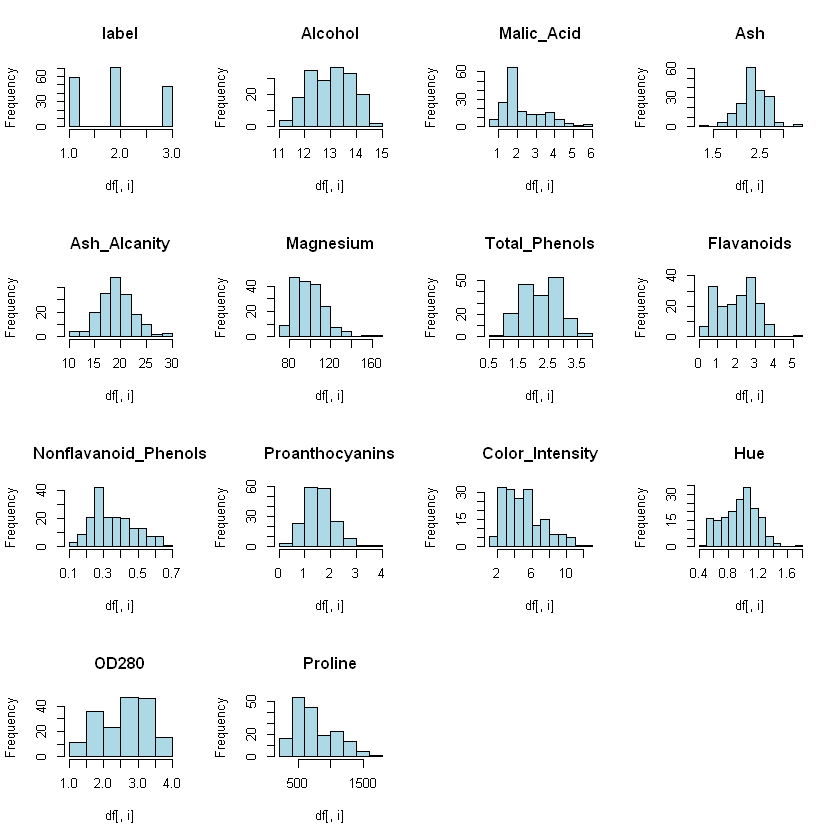

In [4]:
par(mfrow=c(4,4))
for(i in 1:14) {
    hist(df[,i], main=names(df)[i], col='lightblue')
}

corrplot 0.84 loaded


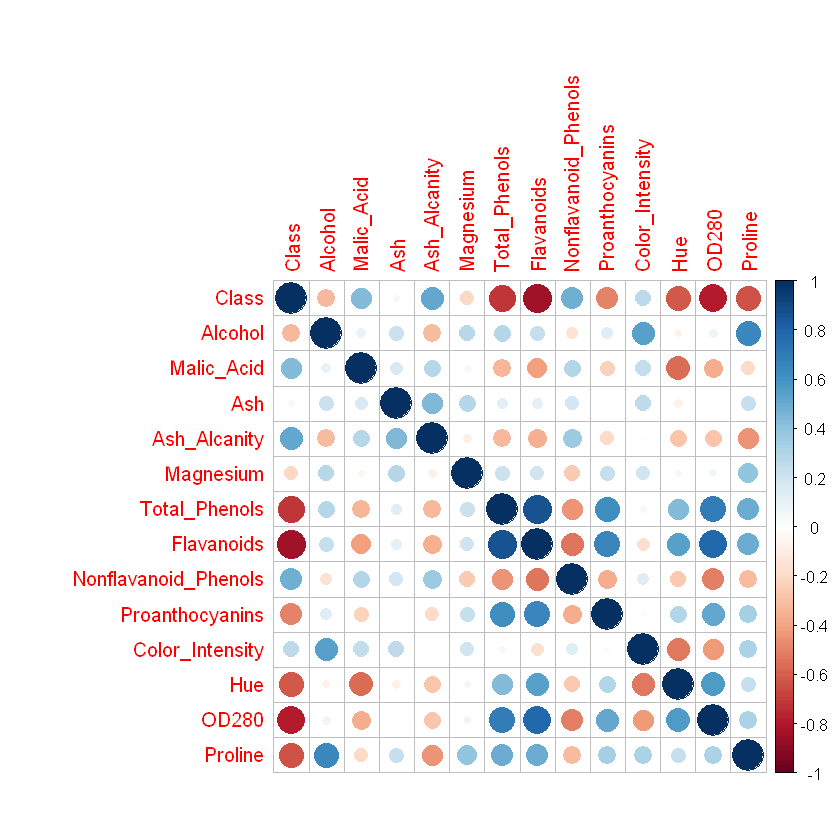

In [6]:
library(corrplot)
corrplot(cor(df), method="circle")

In [19]:
str(df)

'data.frame':	178 obs. of  14 variables:
 $ label               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Alcohol             : num  14.2 13.2 13.2 14.4 13.2 ...
 $ Malic_Acid          : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ash                 : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ Ash_Alcanity        : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Magnesium           : int  127 100 101 113 118 112 96 121 97 98 ...
 $ Total_Phenols       : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flavanoids          : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Nonflavanoid_Phenols: num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proanthocyanins     : num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Color_Intensity     : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Hue                 : num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ OD280               : num  3.92 3

In [20]:
table(df$label) #imbalanced labels


 1  2  3 
59 71 48 

In [21]:
any(is.na(df))

[1] FALSE

## Data preprocessing

In [12]:
library(caTools)
library(caret)
seed = 101 #random seed for reproducibility
set.seed(seed) 

** Encode Label **

In [11]:
df$label = factor(df$label, labels=c(1,2,3))
table(df$label)
str(df)


 1  2  3 
59 71 48 

'data.frame':	178 obs. of  14 variables:
 $ label               : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ Alcohol             : num  14.2 13.2 13.2 14.4 13.2 ...
 $ Malic_Acid          : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ash                 : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ Ash_Alcanity        : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Magnesium           : int  127 100 101 113 118 112 96 121 97 98 ...
 $ Total_Phenols       : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flavanoids          : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Nonflavanoid_Phenols: num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proanthocyanins     : num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Color_Intensity     : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Hue                 : num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ OD280 

** Split Train Test Sets **

In [13]:
split = sample.split(df$label, SplitRatio = 0.80)
train_set = subset(df, split == TRUE)
test_set = subset(df, split == FALSE)

** Scale features **

In [14]:
# standardize data
label_col  = 1
train_set[-label_col] = scale(train_set[-label_col])
test_set[-label_col] = scale(test_set[-label_col])
summary(train_set)

 label     Alcohol          Malic_Acid           Ash          
 1:47   Min.   :-1.9510   Min.   :-1.3060   Min.   :-3.61040  
 2:57   1st Qu.:-0.8246   1st Qu.:-0.6484   1st Qu.:-0.56458  
 3:38   Median : 0.0571   Median :-0.4155   Median :-0.02068  
        Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
        3rd Qu.: 0.8572   3rd Qu.: 0.6053   3rd Qu.: 0.72264  
        Max.   : 2.2911   Max.   : 3.1787   Max.   : 3.17018  
  Ash_Alcanity       Magnesium       Total_Phenols        Flavanoids     
 Min.   :-2.5580   Min.   :-2.1076   Min.   :-2.05932   Min.   :-1.7139  
 1st Qu.:-0.7313   1st Qu.:-0.7674   1st Qu.:-0.88673   1st Qu.:-0.8236  
 Median :-0.1029   Median :-0.1326   Median :-0.09976   Median : 0.0869  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.6278   3rd Qu.: 0.5727   3rd Qu.: 0.80526   3rd Qu.: 0.8118  
 Max.   : 3.1121   Max.   : 4.3816   Max.   : 2.50513   Max.   : 3.0415  
 Nonflavanoid_Phenols Proanthocyanins    

## Baseline Model

In [17]:
# Train/Evaluate SVM
library(e1071)
model = svm(formula = label ~ ., data = train_set,
            type = 'C-classification',kernel = 'linear')                     
predictions = predict(model, newdata = test_set[-label_col])
confusionMatrix(predictions, test_set$label)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 12  1  0
         2  0 12  0
         3  0  1 10

Overall Statistics
                                          
               Accuracy : 0.9444          
                 95% CI : (0.8134, 0.9932)
    No Information Rate : 0.3889          
    P-Value [Acc > NIR] : 2.763e-12       
                                          
                  Kappa : 0.9165          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            1.0000   0.8571   1.0000
Specificity            0.9583   1.0000   0.9615
Pos Pred Value         0.9231   1.0000   0.9091
Neg Pred Value         1.0000   0.9167   1.0000
Prevalence             0.3333   0.3889   0.2778
Detection Rate         0.3333   0.3333   0.2778
Detection Prevalence   0.3611   0.3333   0.3056
Balanced Accuracy      0.9792   0.9286   0.9808

## 1. Principal Component Analysis (PCA)

In [18]:
# Apply PCA
library(e1071)
pca = preProcess(x = train_set[-label_col], method = 'pca', pcaComp = 2)
train_pca = predict(pca, train_set)
train_pca = train_pca[c(2, 3, 1)]
test_pca = predict(pca, test_set)
test_pca = test_pca[c(2, 3, 1)]

In [19]:
# Train/Evaluate SVM
model = svm(formula = label ~ ., data = train_pca,
            type = 'C-classification',kernel = 'linear')                     
predictions = predict(model, newdata = test_pca[-3])
confusionMatrix(predictions, test_pca$label)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 12  0  0
         2  0 13  0
         3  0  1 10

Overall Statistics
                                          
               Accuracy : 0.9722          
                 95% CI : (0.8547, 0.9993)
    No Information Rate : 0.3889          
    P-Value [Acc > NIR] : 9.861e-14       
                                          
                  Kappa : 0.9581          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            1.0000   0.9286   1.0000
Specificity            1.0000   1.0000   0.9615
Pos Pred Value         1.0000   1.0000   0.9091
Neg Pred Value         1.0000   0.9565   1.0000
Prevalence             0.3333   0.3889   0.2778
Detection Rate         0.3333   0.3611   0.2778
Detection Prevalence   0.3333   0.3611   0.3056
Balanced Accuracy      1.0000   0.9643   0.9808

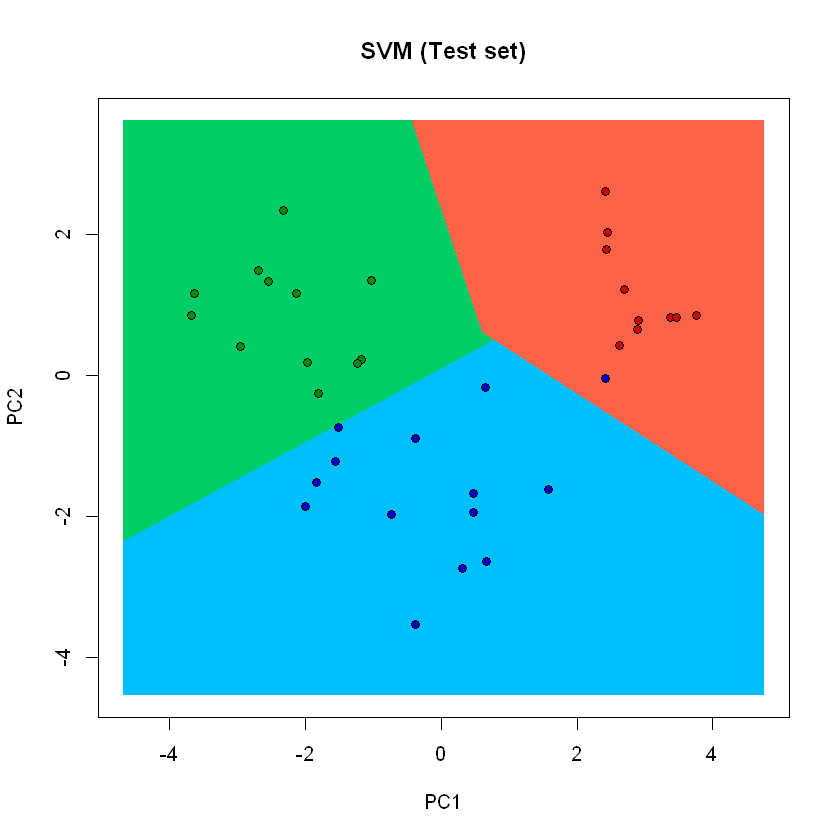

In [46]:
# Visualize the results
library(ElemStatLearn)
set = test_pca
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('PC1', 'PC2')
y_grid = predict(model, newdata = grid_set)
plot(set[, -3], main = 'SVM (Test set)',
     xlab = 'PC1', ylab = 'PC2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))

## 2. Linear Discriminant Analysis (LDA)

In [20]:
# Apply LDA
library(MASS)
lda = lda(formula = label ~ ., data = train_set)
train_lda = as.data.frame(predict(lda, train_set))
train_lda = train_lda[c(5,6,1)]
test_lda = as.data.frame(predict(lda, test_set))
test_lda = test_lda[c(5,6,1)]

In [26]:
# Train/Evaluate SVM
model = svm(formula = class ~ ., data = train_lda, 
            type = 'C-classification',kernel = 'linear')                     
predictions = predict(model, newdata = test_lda[-3])
confusionMatrix(predictions, test_lda$class)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 12  1  0
         2  0 13  0
         3  0  0 10

Overall Statistics
                                          
               Accuracy : 0.9722          
                 95% CI : (0.8547, 0.9993)
    No Information Rate : 0.3889          
    P-Value [Acc > NIR] : 9.861e-14       
                                          
                  Kappa : 0.958           
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            1.0000   0.9286   1.0000
Specificity            0.9583   1.0000   1.0000
Pos Pred Value         0.9231   1.0000   1.0000
Neg Pred Value         1.0000   0.9565   1.0000
Prevalence             0.3333   0.3889   0.2778
Detection Rate         0.3333   0.3611   0.2778
Detection Prevalence   0.3611   0.3611   0.2778
Balanced Accuracy      0.9792   0.9643   1.0000

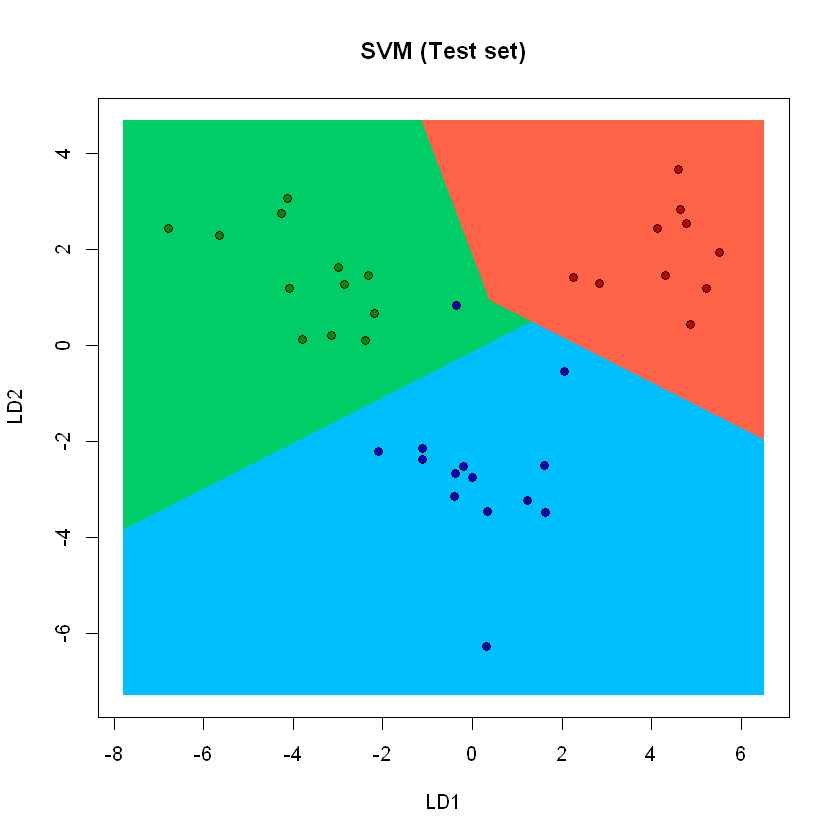

In [27]:
# Visualize the results
library(ElemStatLearn)
set = test_lda
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('x.LD1', 'x.LD2')
y_grid = predict(model, newdata = grid_set)
plot(set[, -3], main = 'SVM (Test set)',
     xlab = 'LD1', ylab = 'LD2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))

## 3. Kernel PCA

In [23]:
## Apply Kernel PCA
library(kernlab)
kpca = kpca(~., data = train_set[-label_col], kernel = 'rbfdot', features = 2)
train_kpca = as.data.frame(predict(kpca, train_set))
train_kpca$label = train_set$label
test_kpca = as.data.frame(predict(kpca, test_set))
test_kpca$label = test_set$label

In [24]:
# Train/Evaluate SVM
model = svm(formula = label ~ ., data = train_kpca,
            type = 'C-classification',kernel = 'linear')                     
predictions = predict(model, newdata = test_kpca[-3])
confusionMatrix(predictions, test_kpca$label)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 11  0  0
         2  1 13  0
         3  0  1 10

Overall Statistics
                                          
               Accuracy : 0.9444          
                 95% CI : (0.8134, 0.9932)
    No Information Rate : 0.3889          
    P-Value [Acc > NIR] : 2.763e-12       
                                          
                  Kappa : 0.9161          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9167   0.9286   1.0000
Specificity            1.0000   0.9545   0.9615
Pos Pred Value         1.0000   0.9286   0.9091
Neg Pred Value         0.9600   0.9545   1.0000
Prevalence             0.3333   0.3889   0.2778
Detection Rate         0.3056   0.3611   0.2778
Detection Prevalence   0.3056   0.3889   0.3056
Balanced Accuracy      0.9583   0.9416   0.9808

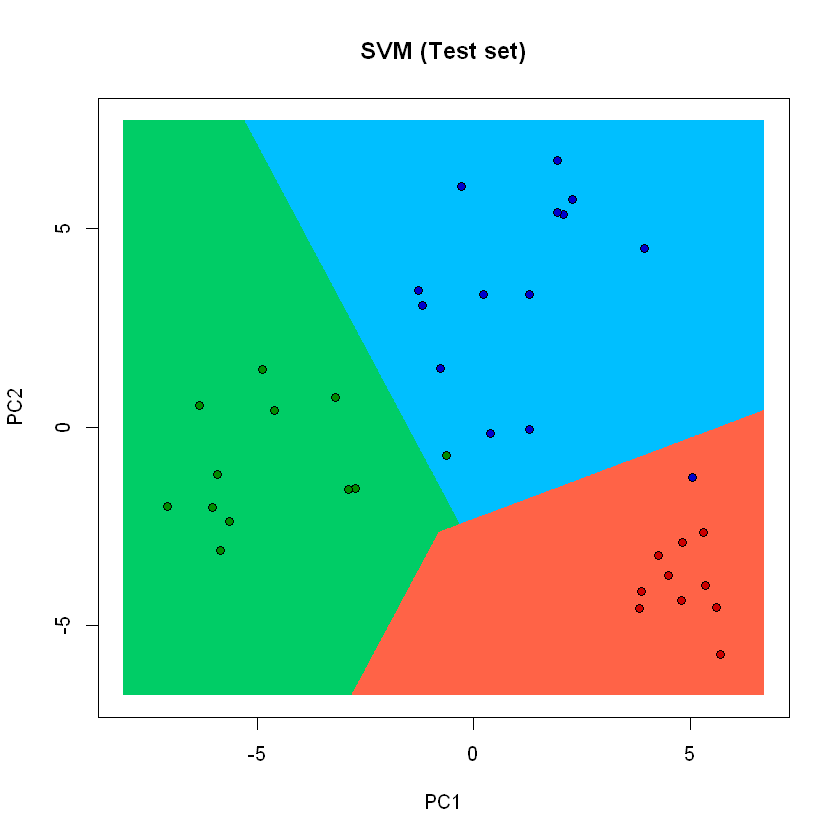

In [67]:
# Visualize the results
library(ElemStatLearn)
set = test_kpca
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('V1', 'V2')
y_grid = predict(model, newdata = grid_set)
plot(set[, -3], main = 'SVM (Test set)',
     xlab = 'PC1', ylab = 'PC2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))